# Karsaaz Home Task - Fraud Detection

### By: Fahad Salman Amim 

## Part 1 - Dataset

It was mentioned in the [provided document](https://docs.google.com/document/d/1ESwDctSUWI39Pws6XSIyKP4gxJLo-saUEexpGmfjH8E/edit?tab=t.0) that the dataset will be provided via a Drive Link. However upon asking, I was informed to research the dataset myself. For this reason, I'll either utilize the Faker library to generate synthetic data (potentially with quality issues) or use an open-source dataset from Kaggle.

Kaggle Dataset Link: [Bank Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data)

The Kaggle dataset covers a lot of features mentioned in the document, such as location, TransactionID etc, and seems to be the best fit for now.

In [2]:
import pandas as pd

df = pd.read_csv('data/fraud detection/bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


The dataset doesn't have a target column, so we will utilize unsupervised algorithms to detect anomalies.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

 No null values found. 

In [5]:
df.describe(include = 'all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000001,AC00362,NaN,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


Checking for duplicate values

In [6]:
df.duplicated().sum()

0

checking the number of unique values in each column

In [7]:
df.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

In [8]:
print(df['DeviceID'].value_counts())
print(df['Location'].value_counts())

DeviceID
D000697    9
D000203    9
D000548    9
D000663    9
D000142    9
          ..
D000130    1
D000298    1
D000087    1
D000071    1
D000543    1
Name: count, Length: 681, dtype: int64
Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Tucson              67
Philadelphia        67
Omaha               65
Miami               64
Detroit             63
Houston             63
Memphis             63
Denver              62
Kansas City         61
Boston              61
Mesa                61
Atlanta             61
Seattle             61
Colorado Springs    60
Jacksonville        60
Fresno              60
Chicago             60
Austin              59
San Jose            59
Raleigh             59
San Antonio         59
San Diego           59
Indianapolis        58
New York            58
San Francisco       57
Nashville           55
Milwaukee           55
Las Vegas           55
Virginia Beach      55
Phoenix             55
Columbus          

In [9]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TransactionID[object],1. TX0000012. TX0016793. TX0016724. TX0016735. TX0016746. TX0016757. TX0016768. TX0016779. TX00167810. TX00168011. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)2,502 (99.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhkls8zM88x8WvshbN7b/nw+fzscDqe1X8K2PR6Pl/3hcDhdr9dfx+Pxde0HsU33+/3pdrud9jMzx+Px9XK5/Fz7UWzasx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPYzfz8BWfshbNdHX8v5fP7u40n+tcfj8eKzcCpv1lVk/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzB0WpV2yec8bJAAAAAElFTkSuQmCC"">",0(0.0%)
2,AccountID[object],1. AC003622. AC003633. AC002024. AC004605. AC002576. AC004567. AC003048. AC004809. AC0022510. AC0026711. other,"12 (0.5%)12 (0.5%)12 (0.5%)12 (0.5%)11 (0.4%)11 (0.4%)11 (0.4%)11 (0.4%)11 (0.4%)10 (0.4%)2,399 (95.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cwWoTUQCG0ZsSit1MCIE8TB6iD+tD5G1CyCxs6SYujCtNFaxfMJ6zEtzM4mMyXu7v4nw+Dyg83PoB+H+IjYzYyIiNjNjIiI2M2MiIjYzYyCzGGE9jjHE+n19u/CzcueVms3keY4zFYvFZcPxND9M0radpWo8xHm/9MNw332xkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY5z/Px8ue3mz4Jd88GgczCf5lFxZuNjHUVGesqMo4+yIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQcS2cjMELGW82MgYvZAxeyDj6ICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxrVwMgYvZHyzkfEzSsa6iox1FRnfbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryLgWTsa6iow3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeNaOBmDFzLebGQMXsgYvJBx9EFGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryNggkLGuIuPNRsa6iox1FRlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYw3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeNaOBmDFzK+2cj4GSVjXUXGuoqMbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWRcCydjXUXGm42MwQsZgxcyjj7IiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJBxLZyMwQuZ7282V8L5KG/XfiWXm83m+bJBgD82z/Px2nhqOU3TerfbvaxWq9dbPBz343Q6fdrv9+vD4fA4xvgxtjHGWK1Wr9vt9kv+dNyjp2t/4ZyNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzHKMb1dDbv0g/Pt+1dFynufjfr9fj3euhsDvugyofjqeci2cj3b1WrjBCxn/QCAjNjJiIyM2MmIjIzYyYiMjNjJiI/MVlHUQJ0ddGaUAAAAASUVORK5CYII="">",0(0.0%)
3,TransactionAmount[float64],Mean (sd) : 297.6 (291.9)min < med < max:0.3 < 211.1 < 1919.1IQR (CV) : 332.6 (1.0),"2,455 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACZElEQVR4nO3cMW/aQBiH8fcKQQZaAyKCzStbB0aWfoN+2K4dI8HMt0BIVgDhhoCQu5SqUtIAd6H1//T8ZnxmeGR0yPe6siwNqLoP//sLAJeon/uAc65pZg3P9fdlWT55Xgv89maozrlmv9//mqZpz2fxzWbz6Jz7RqwIde6J2kjTtDeZTJ46nc7umoXX63UynU57eZ43zIxQEeTsT7+ZWafT2Q0Ggx8e6zc9rgFeYDMFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCY

C:\Users\Asus\AppData\Local\Temp\ipykernel_9492\1262202810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=all_locations.index, x=all_locations.values, palette='viridis')


Text(0, 0.5, 'Location')

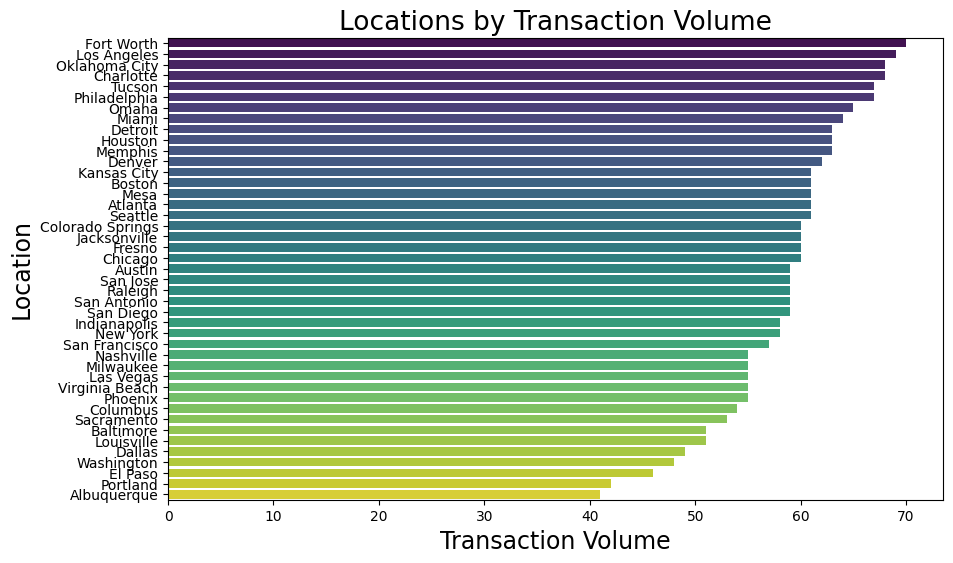

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

all_locations = df['Location'].value_counts().head(50)

plt.figure(figsize=(10,6))
sns.barplot(y = all_locations.index, x = all_locations.values, palette = 'viridis')
plt.title('Locations by Transaction Volume', fontsize = 19)
plt.xlabel('Transaction Volume', fontsize = 17)
plt.ylabel('Location', fontsize = 17)

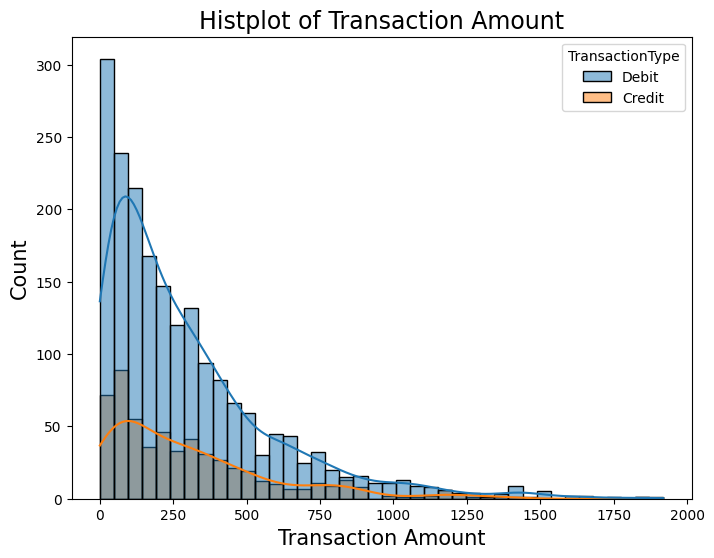

In [11]:
plt.figure(figsize=(8,6))

plt.xlabel("Transaction Amount", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

plt.title("Histplot of Transaction Amount", fontsize = 17)

sns.histplot(data = df, x = "TransactionAmount", kde = True, hue = 'TransactionType')

plt.show()

Text(0.5, 1.0, 'Transaction Types')

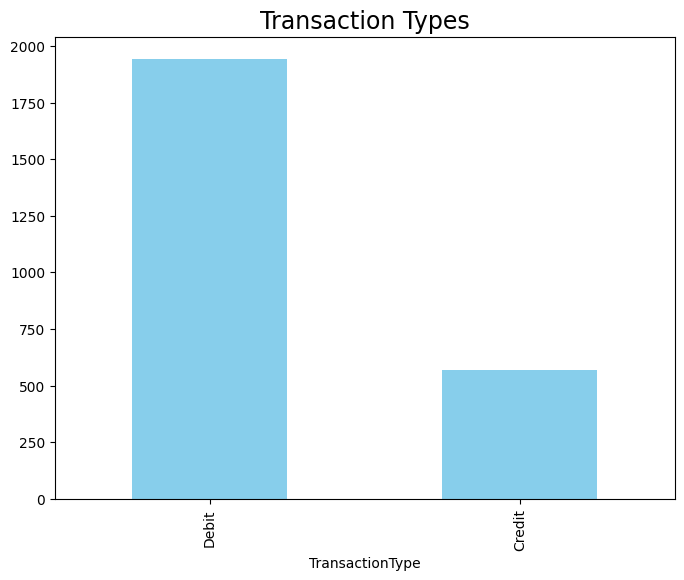

In [12]:
#Bar plot for transaction type
transaction_types = df['TransactionType'].value_counts()
transaction_types.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Transaction Types', fontsize=17)

([<matplotlib.patches.Wedge at 0x292f7eadfd0>,
 [Text(-1.0184761414656598, -0.41557953422326, 'Branch'),
  Text(0.8908700121690613, -0.6452523703310953, 'ATM'),
  Text(0.15523973092213172, 1.0889906454801273, 'Online')],
 [Text(-0.5555324407994507, -0.22667974593995996, '34.6%'),
  Text(0.4859290975467606, -0.35195583836241556, '33.2%'),
  Text(0.0846762168666173, 0.5939948975346149, '32.3%')])

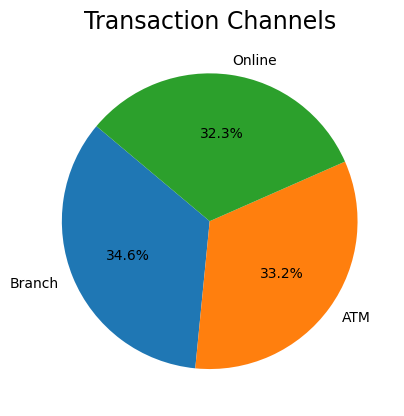

In [15]:
channel_counts = df['Channel'].value_counts()

plt.title('Transaction Channels', fontsize = 17)

plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140)

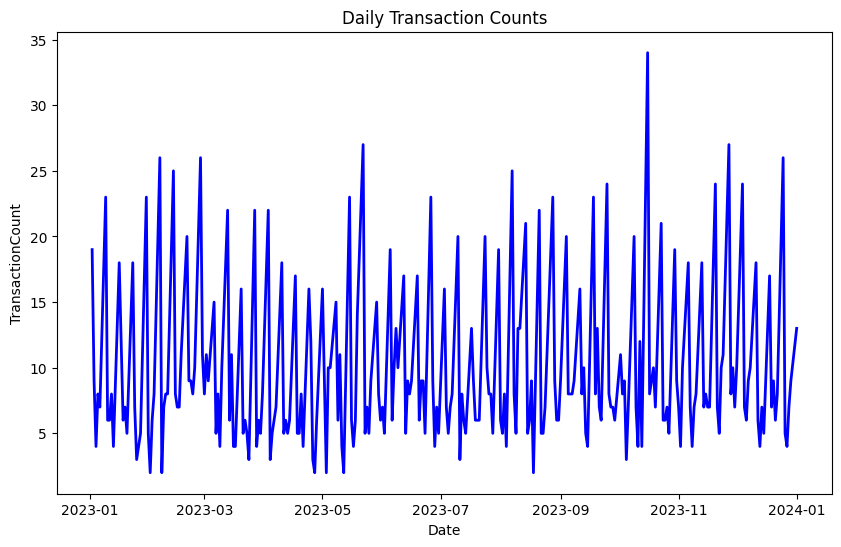

In [ ]:
from datetime import datetime

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionDay'] = df['TransactionDate'].dt.date
daily_counts = df.groupby('TransactionDay').size() #count gives count of each column in the dataframe
#print(daily_counts) 
plt.figure(figsize = (10, 6))
daily_counts.plot(title = 'Daily Transaction Counts', color = 'blue', linewidth = 2)
plt.xlabel('Date')
plt.ylabel('TransactionCount')
plt.show()

Text(0, 0.5, 'Count')

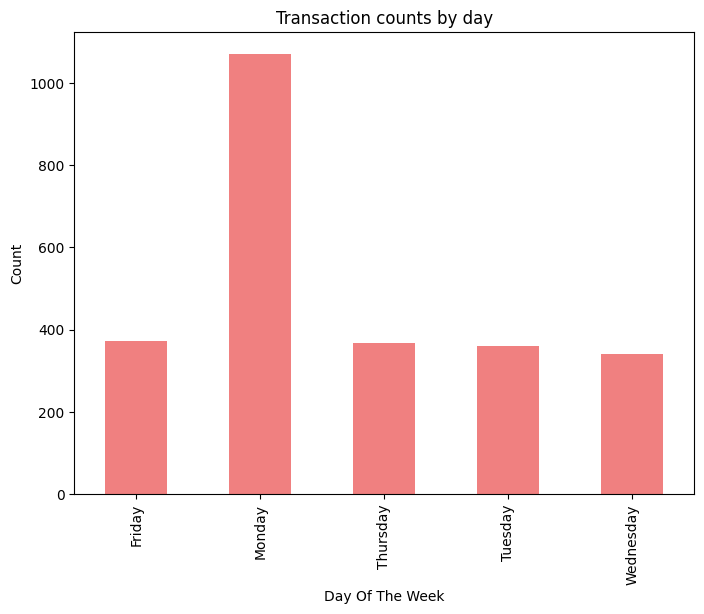

In [20]:
#Checking transactions according to the day of the week
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

#Engineering a new feature, to see the day of the week
df['TransactionDayCheck'] = df['TransactionDate'].dt.day_name()

#Grouping the data by day of the week
day_count = df.groupby('TransactionDayCheck').size()

day_count.plot(kind = 'bar', title = 'Transaction counts by day',figsize = (8, 6), color = 'lightcoral')
plt.xlabel('Day Of The Week')
plt.ylabel('Count')

Text(0, 0.5, 'Transaction Count')

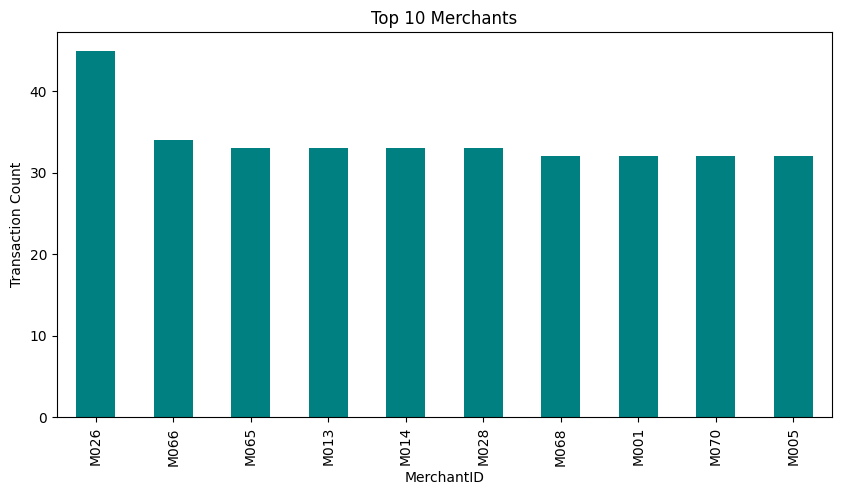

In [22]:
#Checking the top 10 merchants

merchant_counts = df['MerchantID'].value_counts().head(10)
plt.figure(figsize=(10, 5))
merchant_counts.plot(kind='bar', color='teal') #Bar Plot using Pandas
plt.title("Top 10 Merchants")
plt.xlabel("MerchantID")
plt.ylabel("Transaction Count")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

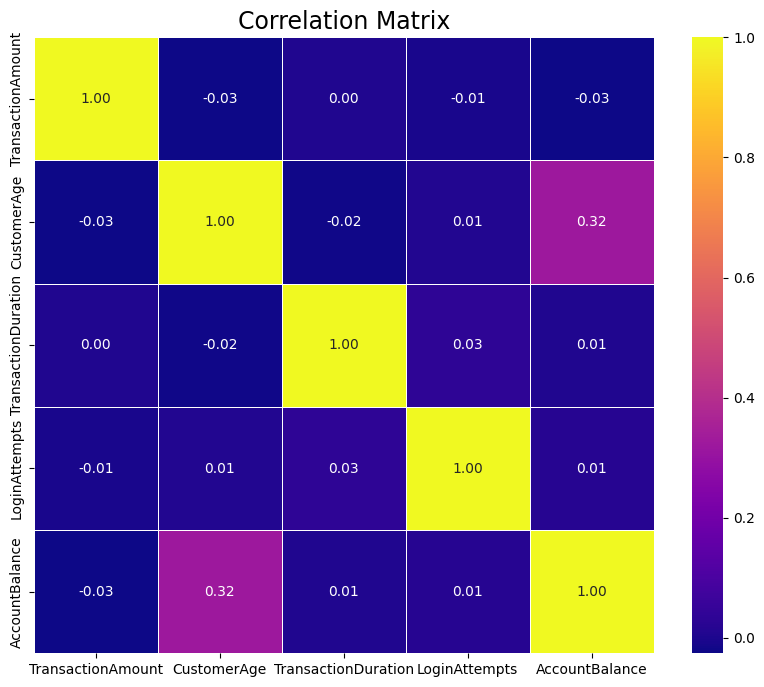

In [30]:
#Visualizing the correlation matrix to analyze the relationship between numerical features

#First, selecting the numerical columns 

numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'plasma',fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=17)
plt.show()

## Model Development

Since there is not much correlation between the numerical features, we can conclude that the features are independent of each other.
The data doesn't have any labels regarding the fraud transactions, so we have to detect the anomaly by using patterns.

There's various ways to identify an anomaly. The ones that are coming to my mind are:
- Transactions from various locations for one account, inevitably changing IP addresses
- Multiple devices with the same account
- Unusual transaction amounts compared to historical data

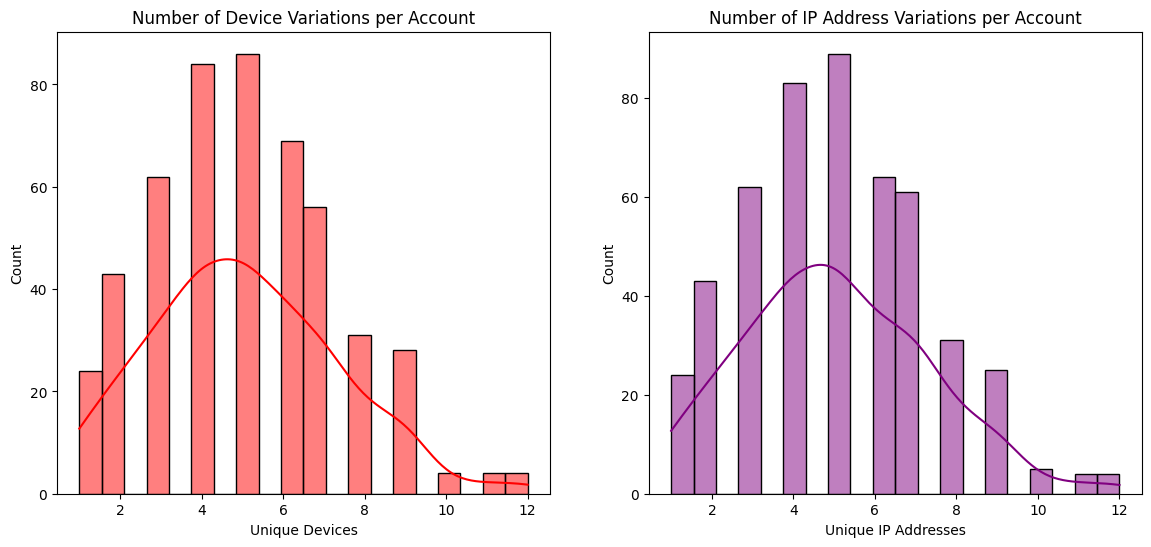

In [35]:
device_variations = df.groupby('AccountID')['DeviceID'].nunique()
ip_variations = df.groupby('AccountID')['IP Address'].nunique()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(device_variations, bins=20, color='red', kde=True) #you can use shades of blue like slateblue
plt.title("Number of Device Variations per Account")
plt.xlabel("Unique Devices")
plt.subplot(1, 2, 2)
sns.histplot(ip_variations, bins=20, color='purple', kde=True)
plt.title("Number of IP Address Variations per Account")
plt.xlabel("Unique IP Addresses")
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

#Selecting our training features
X = df[['TransactionAmount', 'CustomerAge', 'AccountBalance']]

#Performing feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

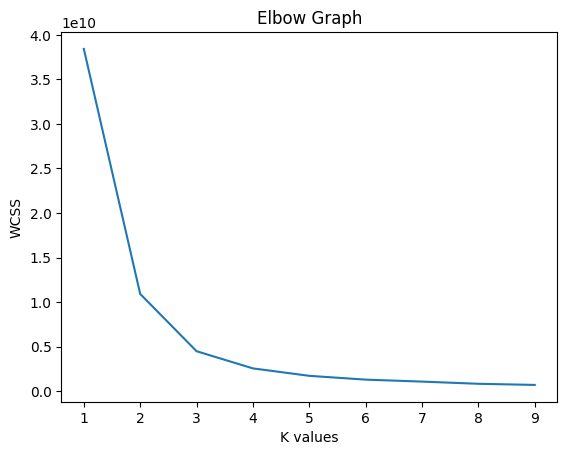

In [37]:
from sklearn.cluster import KMeans

kmeans_model = KMeans()

#Calculating the WCSS (Within-Cluster Sum of Squares) for different values of K
wcss = []

#plotting the wcss graph for elbow
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('Elbow Graph')
plt.xlabel('K values')
plt.ylabel('WCSS')
plt.show()

In [38]:
#Elbow forming at K=3, so we will use 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
predictions = kmeans.fit_predict(X_scaled)
df['ClusterValue'] = predictions

df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionDay,TransactionDayCheck,ClusterValue
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,2023-04-11,Tuesday,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,2023-06-27,Tuesday,2
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,2023-07-10,Monday,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,2023-05-05,Friday,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,2023-10-16,Monday,2


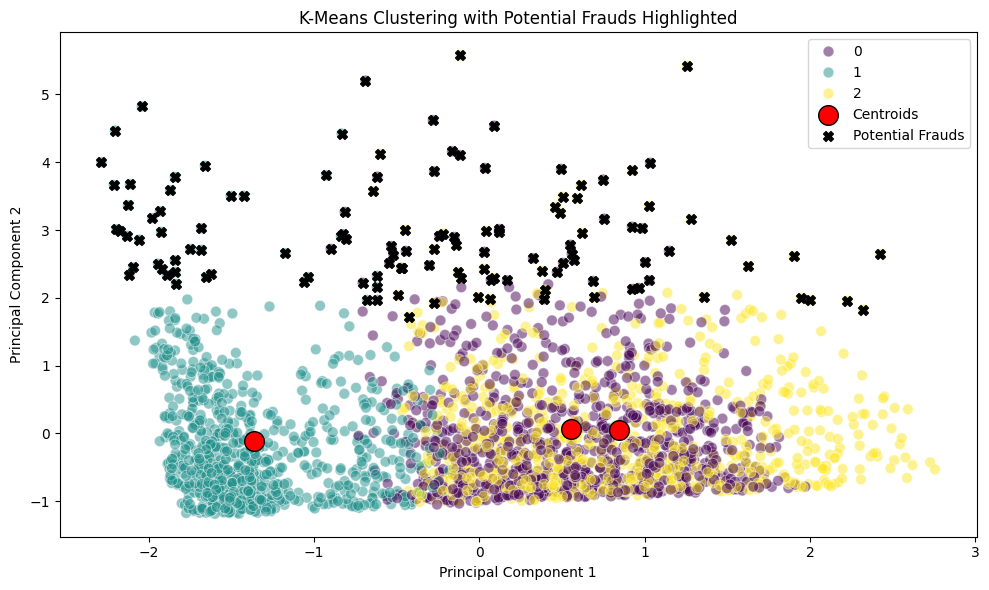

Number of potential frauds detected: 126


In [40]:
#Now, we have to visualize the clusters
import numpy as np
from sklearn.decomposition import PCA

#The first thing we're gonna have to do is calculate the distance of each point from their centroid
euc_distance = np.linalg.norm(X_scaled - kmeans.cluster_centers_[predictions], axis = 1)

# Set a threshold to detect potential frauds
# Flagging the top 5% farthest points as outliers (anomalies)
threshold = np.percentile(euc_distance, 95)

#If distances are greater than the threshold, we flag them as fraud
df['isFraud'] = euc_distance > threshold

#Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = predictions, palette = 'viridis', s = 60, alpha = 0.5)
# Project centroids to PCA space for plotting
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    s=200, c='red', label='Centroids', edgecolor='black'
)
# Highlight potential frauds (points above threshold)
plt.scatter(
    X_pca[euc_distance > threshold, 0], X_pca[euc_distance > threshold, 1],
    color='black', s=50, label='Potential Frauds', marker='X'
)
plt.title('K-Means Clustering with Potential Frauds Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()

# 9. Print how many transactions were flagged
frauds = df[df['isFraud']]
print(f"Number of potential frauds detected: {len(frauds)}")

Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_model = IsolationForest(contamination=0.01)  # estimate fraud rate
isolation_model.fit(X_scaled)

df['anomaly_score'] = isolation_model.decision_function(X_scaled)
df['is_anomaly'] = isolation_model.predict(X_scaled)  # -1 = anomaly, 1 = normal

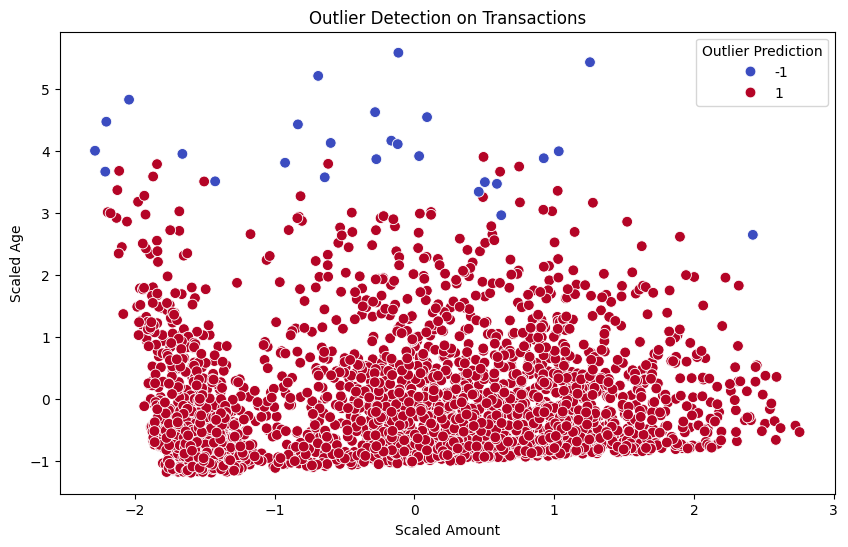

In [44]:
# Plotting with isolation forest outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['is_anomaly'], palette='coolwarm', s=60)
plt.title('Outlier Detection on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Outlier Prediction')
plt.show()

In [ ]:
#Saving the models
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(isolation_model, 'isolation_forest_model.pkl')

# Saving the dataframe with predictions
df.to_csv('data/fraud_detection_predictions.csv', index=False)
print("Models and predictions saved successfully.")

Models and predictions saved successfully.
